In [ ]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

**Loading Adult dataset to Predict Income**

In [ ]:
# Adult dataset path
adult_dataset_path = "/content/adult_dataset.csv"
# Function for loading adult dataset
def load_adult_data(adult_path=adult_dataset_path):
    csv_path = os.path.join(adult_path)
    return pd.read_csv(csv_path)

In [ ]:
# Calling load adult function and assigning to a new variable df
df = load_adult_data()
# load top 3 rows values from adult dataset
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


**Data Overview**

In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  32561
Columns  :  15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

Missing values :   0

Unique values :  
 age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


In [ ]:
# Let's understand the type of values present in each column of our adult dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Numerical feature of summary/description 
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# pull top 5 row values to understand the data and how it's look like
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


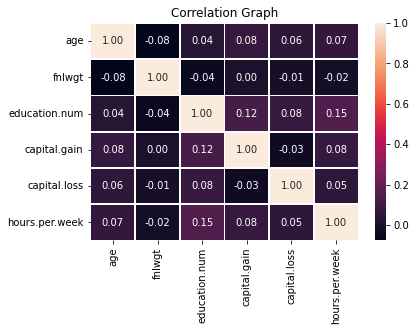

In [ ]:
corr_matrix = df.corr()
# plt.figure(figsize=(10,10))

plt.title("Correlation Graph")

sns.heatmap(corr_matrix, annot = True, fmt='.2f', linewidths=.8);

**Pulling total missing value "?" present in "workclass" feature**

In [ ]:
# checking "?" total values present in particular 'workclass' feature
df_check_missing_workclass = (df['workclass']=='?').sum()
df_check_missing_workclass

NameError: ignored

**Pulling total missing value "?" present in "Occupation" feature**

In [ ]:
# checking "?" total values present in particular 'occupation' feature
df_check_missing_occupation = (df['occupation']=='?').sum()
df_check_missing_occupation

1843

**check "?" values, how many are there in the whole dataset**

In [ ]:
# checking "?" values, how many are there in the whole dataset
df_missing = (df=='?').sum()
df_missing

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

**find out percentage of "?" value present across the dataset**

In [ ]:
percent_missing = (df=='?').sum() * 100/len(df)
percent_missing

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [ ]:
# Let's find total number of rows which doesn't contain any missing value as '?'
df.apply(lambda x: x !='?',axis=1).sum()

age               32561
workclass         30725
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        30718
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    31978
income            32561
dtype: int64

In [ ]:
# dropping the rows having missing values in workclass
df = df[df['workclass'] !='?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


**Analysis on Categorical features/columns is they contain any missing value as'?**

In [ ]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other column contains '?' value
df_categorical.apply(lambda x: x=='?',axis=1).sum()


workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [ ]:
# dropping the "?"s from occupation and native.country
df = df[df['occupation'] !='?']
df = df[df['native.country'] !='?']

In [ ]:
# check the dataset whether cleaned or not?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Data Preparation**

In [ ]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [ ]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


**Let's Contenate df_categorical with master/original dataframe df**

In [ ]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)

# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [ ]:
# look at column type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


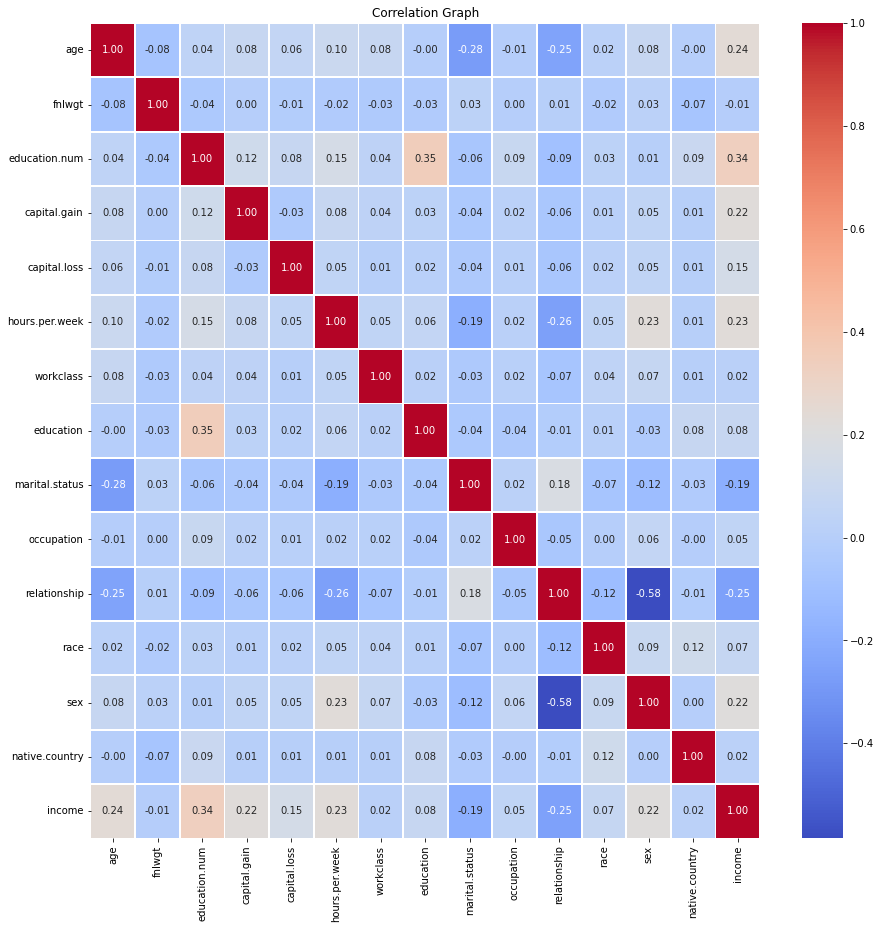

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,15))

plt.title("Correlation Graph")

sns.heatmap(corr_matrix, annot = True, fmt='.2f', linewidths=.8, cmap='coolwarm');

In [ ]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

In [ ]:
# check df info again whether everything is in right format or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   fnlwgt          30162 non-null  int64   
 2   education.num   30162 non-null  int64   
 3   capital.gain    30162 non-null  int64   
 4   capital.loss    30162 non-null  int64   
 5   hours.per.week  30162 non-null  int64   
 6   workclass       30162 non-null  int64   
 7   education       30162 non-null  int64   
 8   marital.status  30162 non-null  int64   
 9   occupation      30162 non-null  int64   
 10  relationship    30162 non-null  int64   
 11  race            30162 non-null  int64   
 12  sex             30162 non-null  int64   
 13  native.country  30162 non-null  int64   
 14  income          30162 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


**Model Building and Evaluation**

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Putting independent variables/features to X
X = df.drop('income',axis=1)

# Putting response/dependent variable/feature to y
y = df['income']

In [ ]:
X.head(3)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38


In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



[[6553  314]
 [1039 1143]]
0.8504807161012267


Text(0.5, 1.0, 'Accuracy Score: 0.8504807161012267')

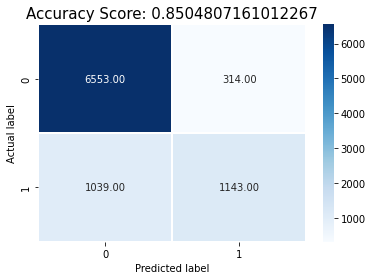

In [ ]:
# Printing confusion matrix and accuracy
cma = confusion_matrix(y_test, y_pred_default)
print(cma)
print(accuracy_score(y_test,y_pred_default))

# plt.figure(figsize=(5,5))
sns.heatmap(data=cma, linewidths=.5, annot=True, cmap='Blues', fmt='.2f')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sample_title = 'Accuracy Score: {0}'.format(dt_default.score(X_test, y_test))
plt.title(sample_title, size = 15)

In [ ]:
cm.shape

(2, 2)

**Plotting the Decision Tree**

In [ ]:
!pip install pydotplus

In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz

# Putting features
features = list(df.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

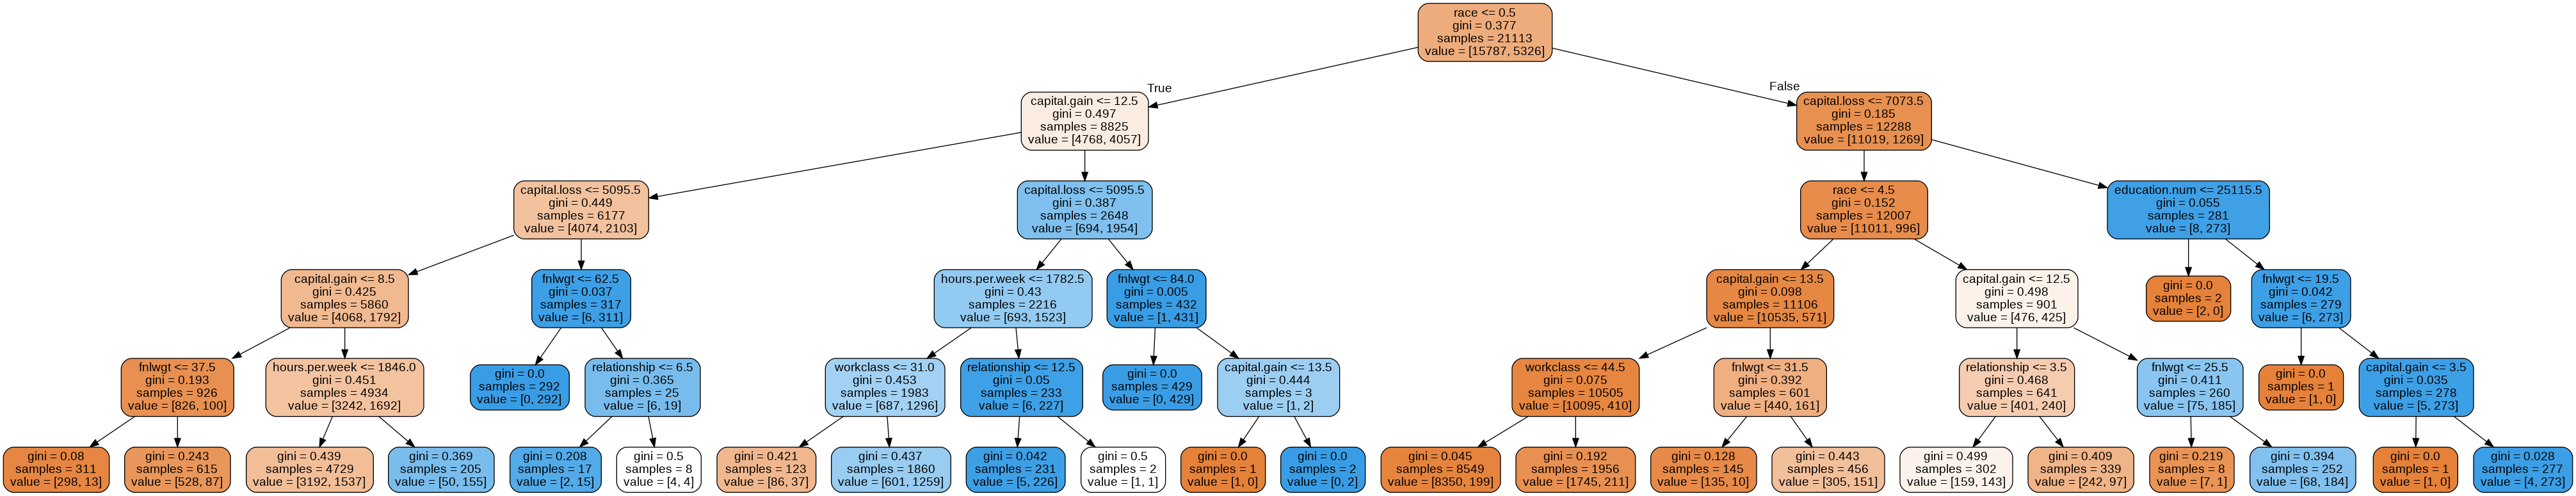

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Hyperparameter Tuning**

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013956,0.001755,0.002549,0.000412,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,0.747750,0.747738,0.000087,39
1,0.017630,0.000448,0.002533,0.000113,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,0.822833,0.819969,0.004538,16
2,0.022332,0.000477,0.002629,0.000218,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,0.837518,0.834273,0.003115,12
3,0.027866,0.000303,0.002653,0.000105,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,0.842255,0.840193,0.003860,9
4,0.033011,0.000628,0.002949,0.000791,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,0.847466,0.843319,0.004858,7


In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076007,0.002399,0.002728,0.000054,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,0.818806,0.823616,0.003696,10
1,0.060936,0.000854,0.002513,0.000053,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,0.849360,0.844788,0.004651,6
2,0.058140,0.002151,0.002505,0.000055,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,0.851729,0.848293,0.003194,1
3,0.054511,0.002679,0.002450,0.000042,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,0.838465,0.845830,0.005589,2
4,0.053431,0.004443,0.002587,0.000274,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,0.842018,0.845214,0.004834,3


In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040027,0.004135,0.002273,0.000064,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.038711,0.002244,0.002281,0.000076,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.036953,0.000191,0.002157,0.000048,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.038388,0.001818,0.002223,0.000053,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.063207,0.001952,0.002421,0.000083,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
5,0.063626,0.002008,0.002506,0.000104,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
6,0.059001,0.002335,0.002670,0.000463,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
7,0.060973,0.004980,0.003265,0.001441,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
8,0.031497,0.001879,0.002279,0.000073,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9
9,0.031293,0.001829,0.002311,0.000082,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9


In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8510400232064759
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search.**

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

0.850922753895458

In [ ]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8393192617968837


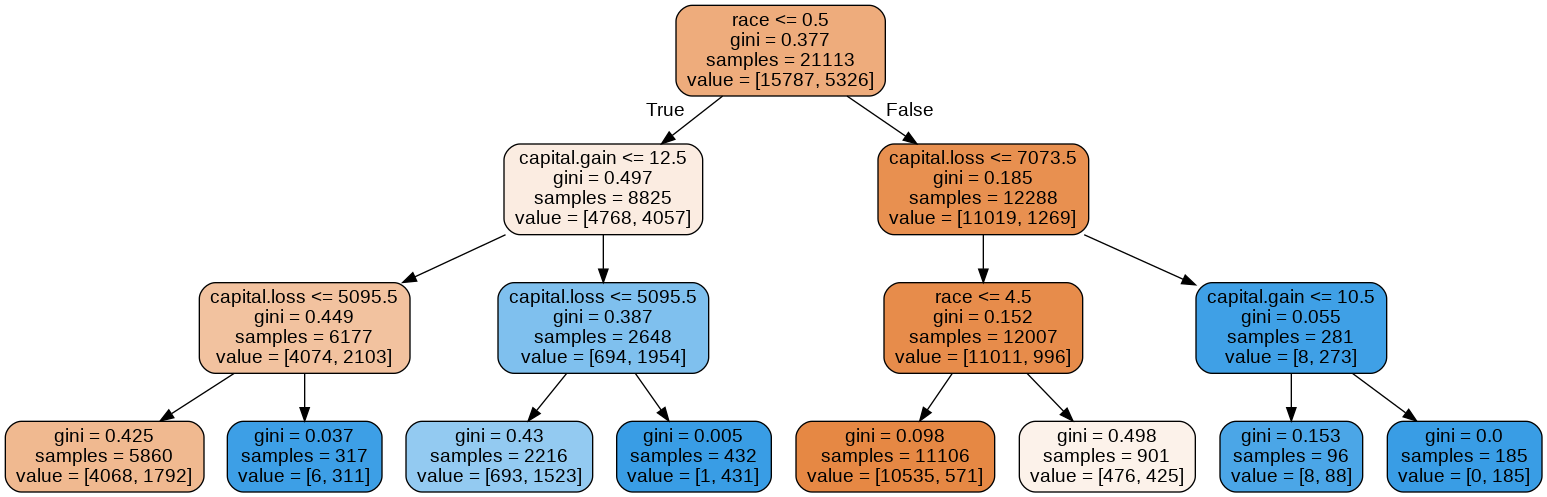

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())